#Descriptive Analytics for Numerical Columns

In [1]:
# Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
sales = pd.read_csv('/content/sales_data_with_discounts.csv')
sales

Date       Day  SKU City  Volume         BU  Brand       Model  \
0    01-04-2021  Thursday  M01    C      15    Mobiles  RealU       RU-10   
1    01-04-2021  Thursday  M02    C      10    Mobiles  RealU   RU-9 Plus   
2    01-04-2021  Thursday  M03    C       7    Mobiles   YouM       YM-99   
3    01-04-2021  Thursday  M04    C       6    Mobiles   YouM  YM-99 Plus   
4    01-04-2021  Thursday  M05    C       3    Mobiles   YouM      YM-98    
..          ...       ...  ...  ...     ...        ...    ...         ...   
445  15-04-2021  Thursday  L06    C       2  Lifestyle  Jeera   M-Casuals   
446  15-04-2021  Thursday  L07    C       6  Lifestyle   Viva   W-Western   
447  15-04-2021  Thursday  L08    C       2  Lifestyle   Viva    W-Lounge   
448  15-04-2021  Thursday  L09    C       3  Lifestyle  Jeera   M-Formals   
449  15-04-2021  Thursday  L10    C       1  Lifestyle  Jeera     M-Shoes   

     Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0        12100             181500          11.654820     21153.498820   
1        10100             101000          11.560498     11676.102961   
2        16100             112700           9.456886     10657.910157   
3        20100             120600           6.935385      8364.074702   
4         8100              24300          17.995663      4372.946230   
..         ...                ...                ...              ...   
445       1300               2600          15.475687       402.367873   
446       2600              15600          17.057027      2660.896242   
447       1600               3200          18.965550       606.897606   
448       1900               5700          16.793014       957.201826   
449       3100               3100          15.333300       475.332295   

     Net Sales Value  
0      160346.501180  
1       89323.897039  
2      102042.089843  
3      112235.925298  
4       19927.053770  
..               ...  
445      2197.632127  
446     12939.103758  
447      2593.102394  
448      4742.798174  
449      2624.667705  

[450 rows x 13 columns]

In [3]:
# Indentifying the numeric columns
sales.info()
# Volume, Avg Price, Total Sales Value, Discount Rate(%), Discount Amount, Net Sales Value; Are the numerical columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [4]:
# Mean, Median(50%), Std can be seen in the following table
sales.describe()

Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.788059  
75%        5316.495427     47847.912852  
max       25738.022194    179507.479049

In [5]:
# Finding Mode of all the columns
Modes = {}
for i in sales.columns:
    Modes[i] = sales[i].mode()
print(Modes)
# Here many columns are multimodal

{'Date': 0     01-04-2021
1     02-04-2021
2     03-04-2021
3     04-04-2021
4     05-04-2021
5     06-04-2021
6     07-04-2021
7     08-04-2021
8     09-04-2021
9     10-04-2021
10    11-04-2021
11    12-04-2021
12    13-04-2021
13    14-04-2021
14    15-04-2021
Name: Date, dtype: object, 'Day': 0    Thursday
Name: Day, dtype: object, 'SKU': 0     F01
1     F02
2     F03
3     F04
4     F05
5     F06
6     F07
7     F08
8     F09
9     F10
10    L01
11    L02
12    L03
13    L04
14    L05
15    L06
16    L07
17    L08
18    L09
19    L10
20    M01
21    M02
22    M03
23    M04
24    M05
25    M06
26    M07
27    M08
28    M09
29    M10
Name: SKU, dtype: object, 'City': 0    C
Name: City, dtype: object, 'Volume': 0    3
Name: Volume, dtype: int64, 'BU': 0         FMCG
1    Lifestyle
2      Mobiles
Name: BU, dtype: object, 'Brand': 0    Jeera
Name: Brand, dtype: object, 'Model': 0       Babaji Cream
1        Babaji Oil 
2     Babaji Shampoo
3      Gear BB Cream
4         Gear Cream
5   

# Data Visualization

array([[<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Avg Price'}>,
        <Axes: title={'center': 'Total Sales Value'}>],
       [<Axes: title={'center': 'Discount Rate (%)'}>,
        <Axes: title={'center': 'Discount Amount'}>,
        <Axes: title={'center': 'Net Sales Value'}>]], dtype=object)

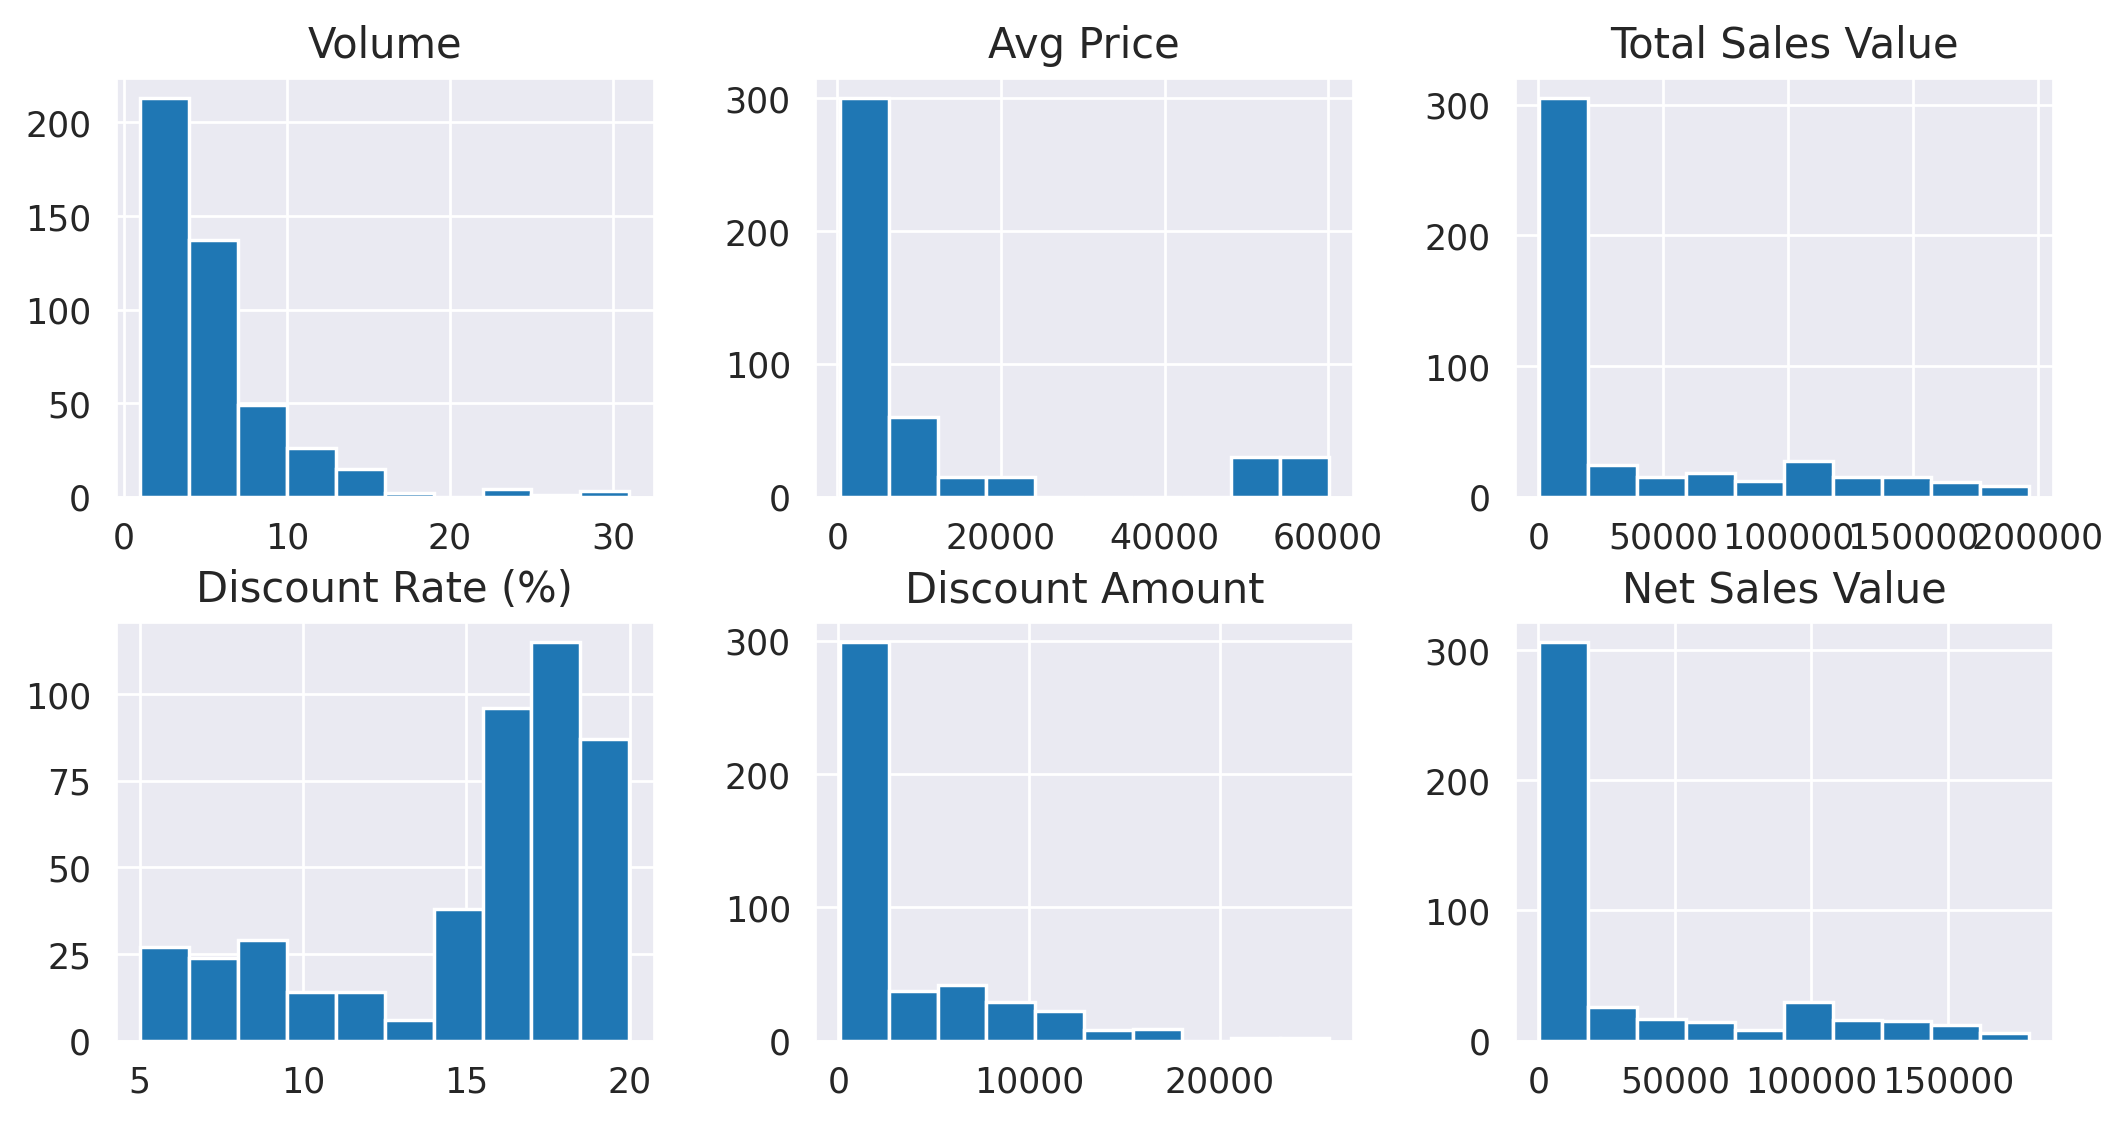

In [6]:
# Histogram for each numeric columns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid') # background
fig, axis = plt.subplots(2,3)
sales.hist(ax=axis)
# As we can see there are outliers present in each of the columns
# Mostly all the columns are right skewed except Discount Rate which is left skewed

<Axes: >

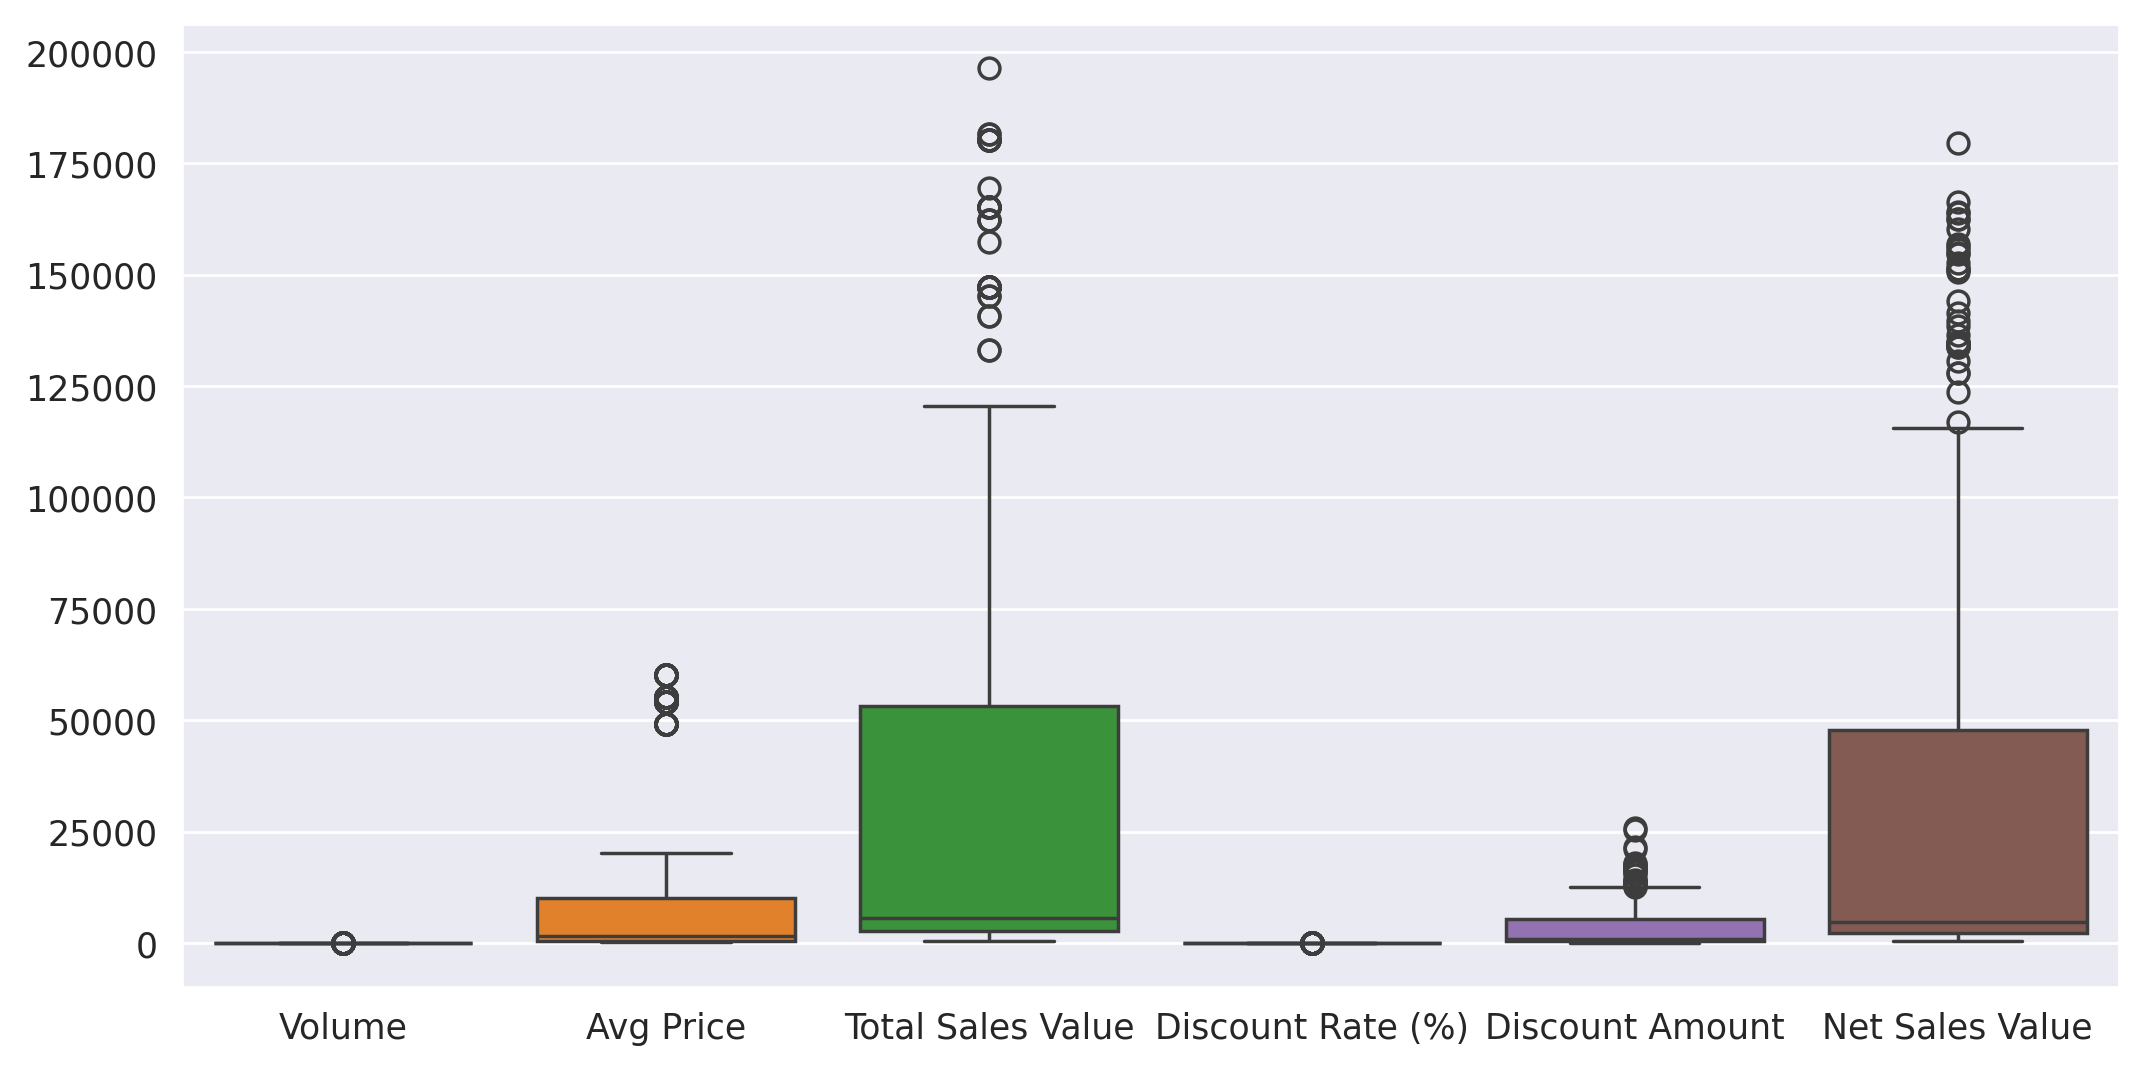

In [7]:
# Boxplot
sns.boxplot(sales)
# Alsmost every column has some outliers,
# Total and Net sales value has most of the outliers present

In [8]:
sales['Avg Price'].dtype

dtype('int64')

In [9]:
# Finding the IQR
numeric_col=[x for x in sales.columns if sales[x].dtype =='int64' or sales[x].dtype == 'float64']
IQR={}
for i in numeric_col:
    IQR[i] = sales[i].quantile(0.75) - sales[i].quantile(0.25)
IQR

{'Volume': 3.0,
 'Avg Price': 9635.0,
 'Total Sales Value': 50500.0,
 'Discount Rate (%)': 4.149655934050962,
 'Discount Amount': 4856.03612280112,
 'Net Sales Value': 45645.70420627015}

In [10]:
# Finding the Outliers count
Outliers_count={}
extremes={}
for i in numeric_col:
    ll=sales[i].quantile(0.25) - (1.5 * IQR[i])
    ul=sales[i].quantile(0.75) + (1.5 * IQR[i])
    extremes[i]={'Lower Extreme':ll, 'Upper Extreme':ul}
    Outliers_count[i] = sales.loc[sales[i]>ul, i].shape[0] + sales.loc[sales[i]<ll, i].shape[0]
print('Outliers Present: ')
Outliers_count

Outliers Present: 


{'Volume': 44,
 'Avg Price': 60,
 'Total Sales Value': 36,
 'Discount Rate (%)': 45,
 'Discount Amount': 24,
 'Net Sales Value': 35}

In [11]:
# Extreme counts
print('Extremes: ')
extremes

Extremes: 


{'Volume': {'Lower Extreme': -1.5, 'Upper Extreme': 10.5},
 'Avg Price': {'Lower Extreme': -13987.5, 'Upper Extreme': 24552.5},
 'Total Sales Value': {'Lower Extreme': -73050.0, 'Upper Extreme': 128950.0},
 'Discount Rate (%)': {'Lower Extreme': 7.740578642625298,
  'Upper Extreme': 24.339202378829146},
 'Discount Amount': {'Lower Extreme': -6823.594880316146,
  'Upper Extreme': 12600.54961088833},
 'Net Sales Value': {'Lower Extreme': -66266.347664084,
  'Upper Extreme': 116316.46916099661}}

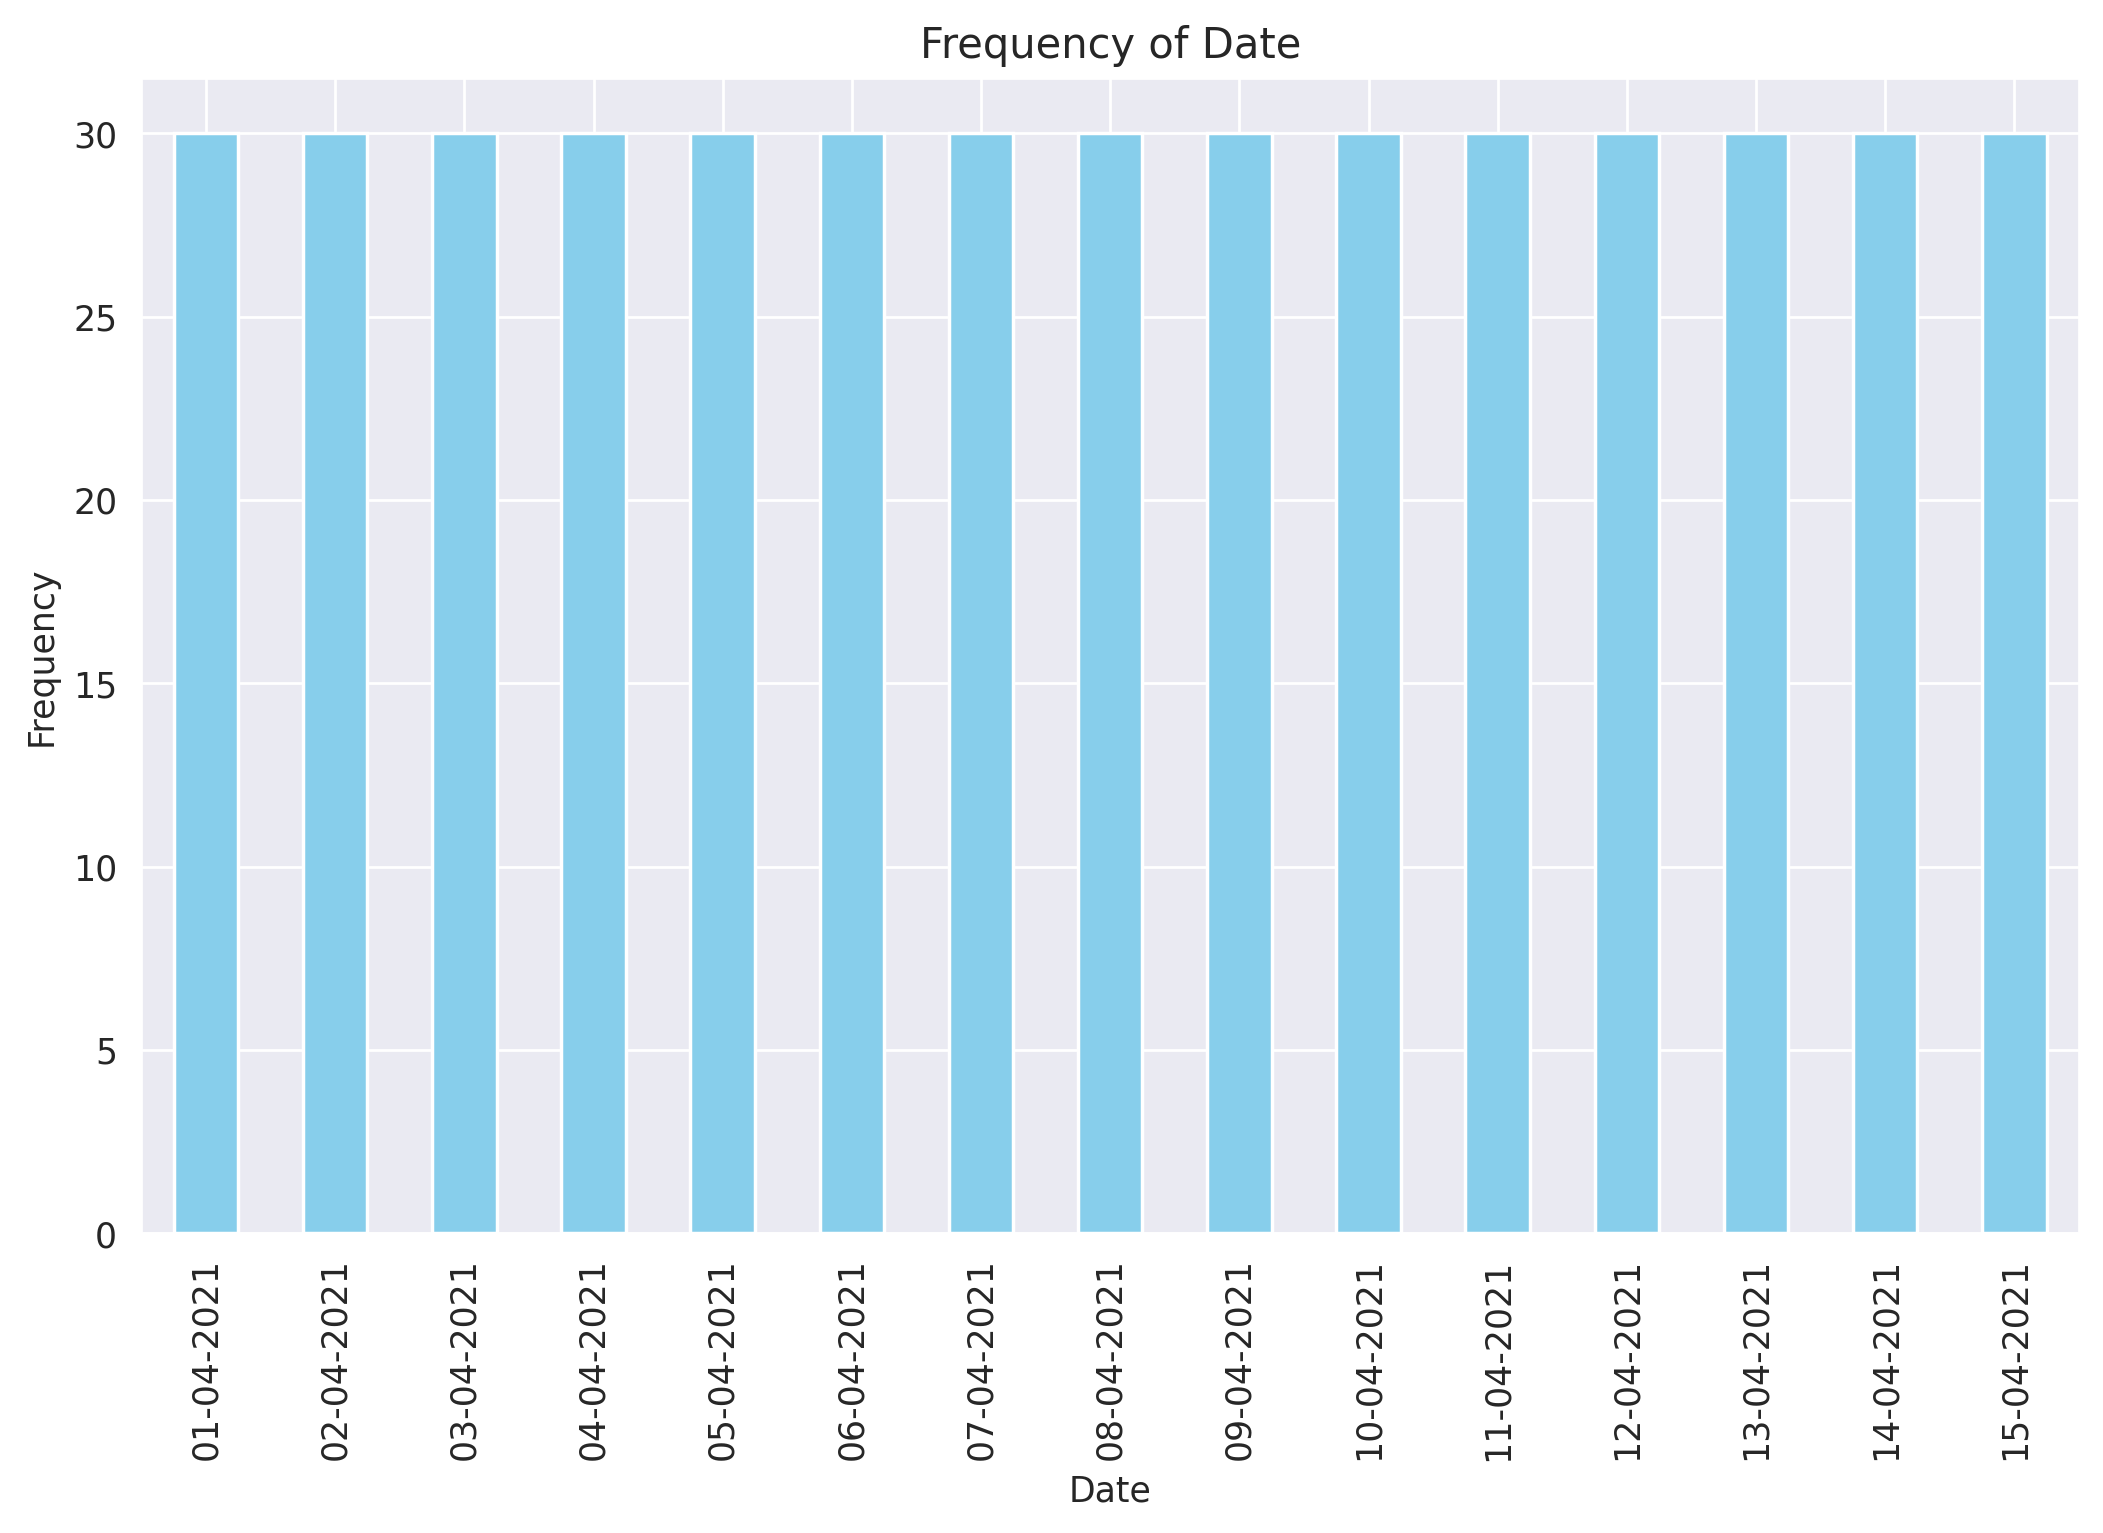

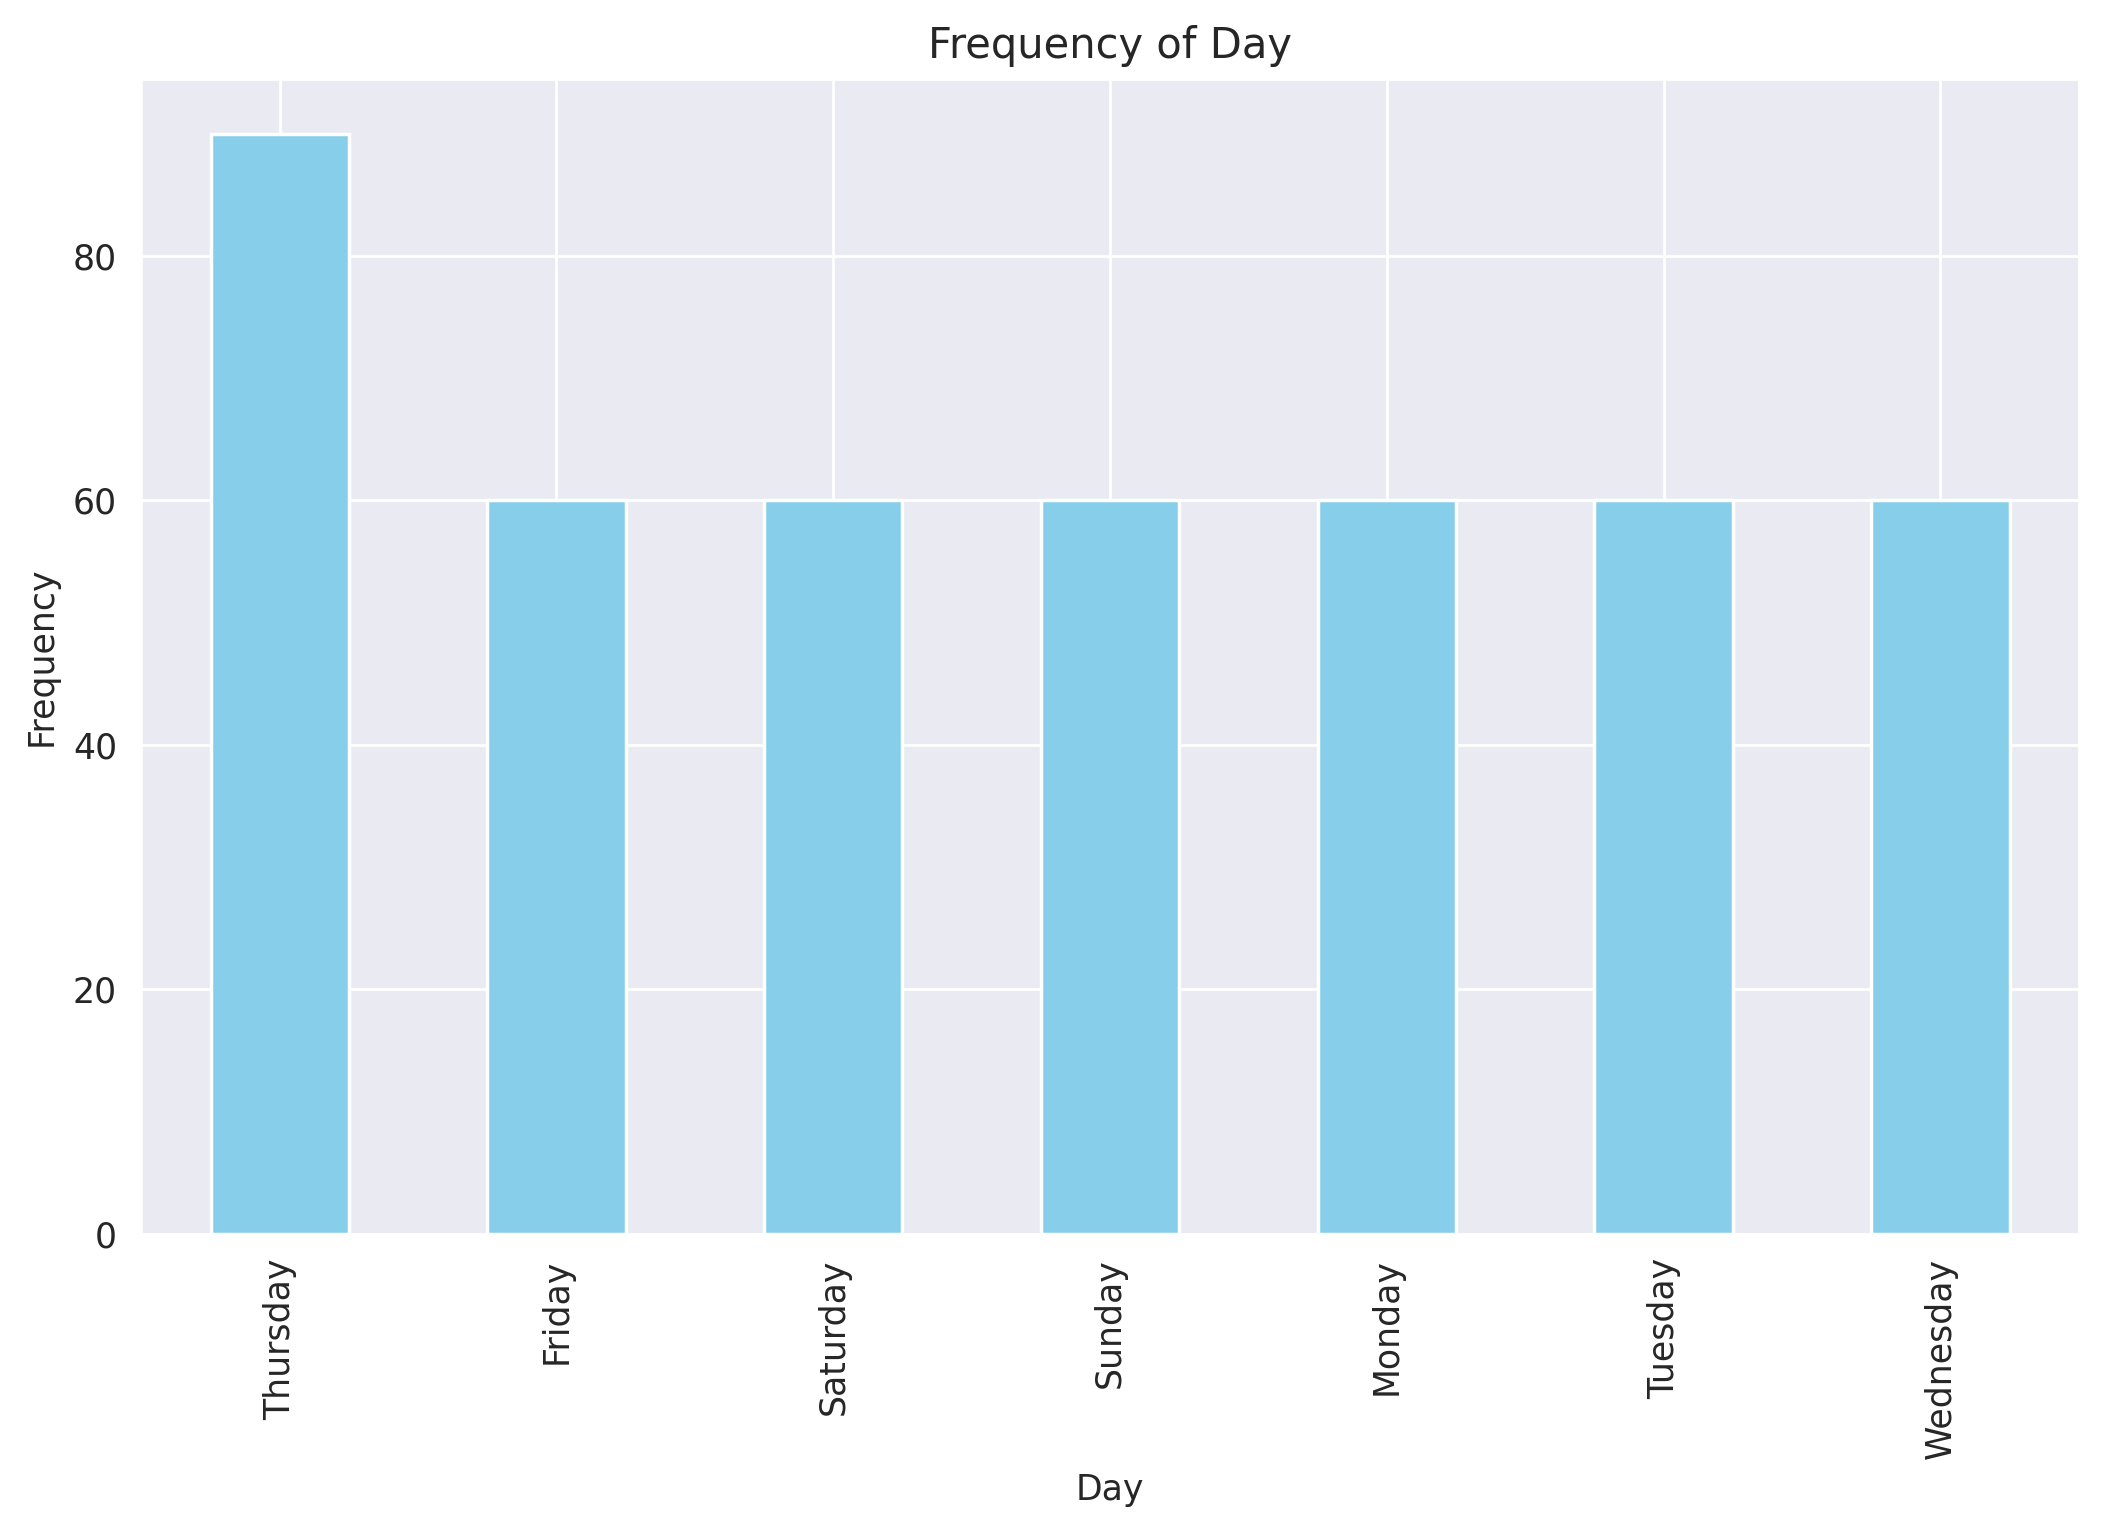

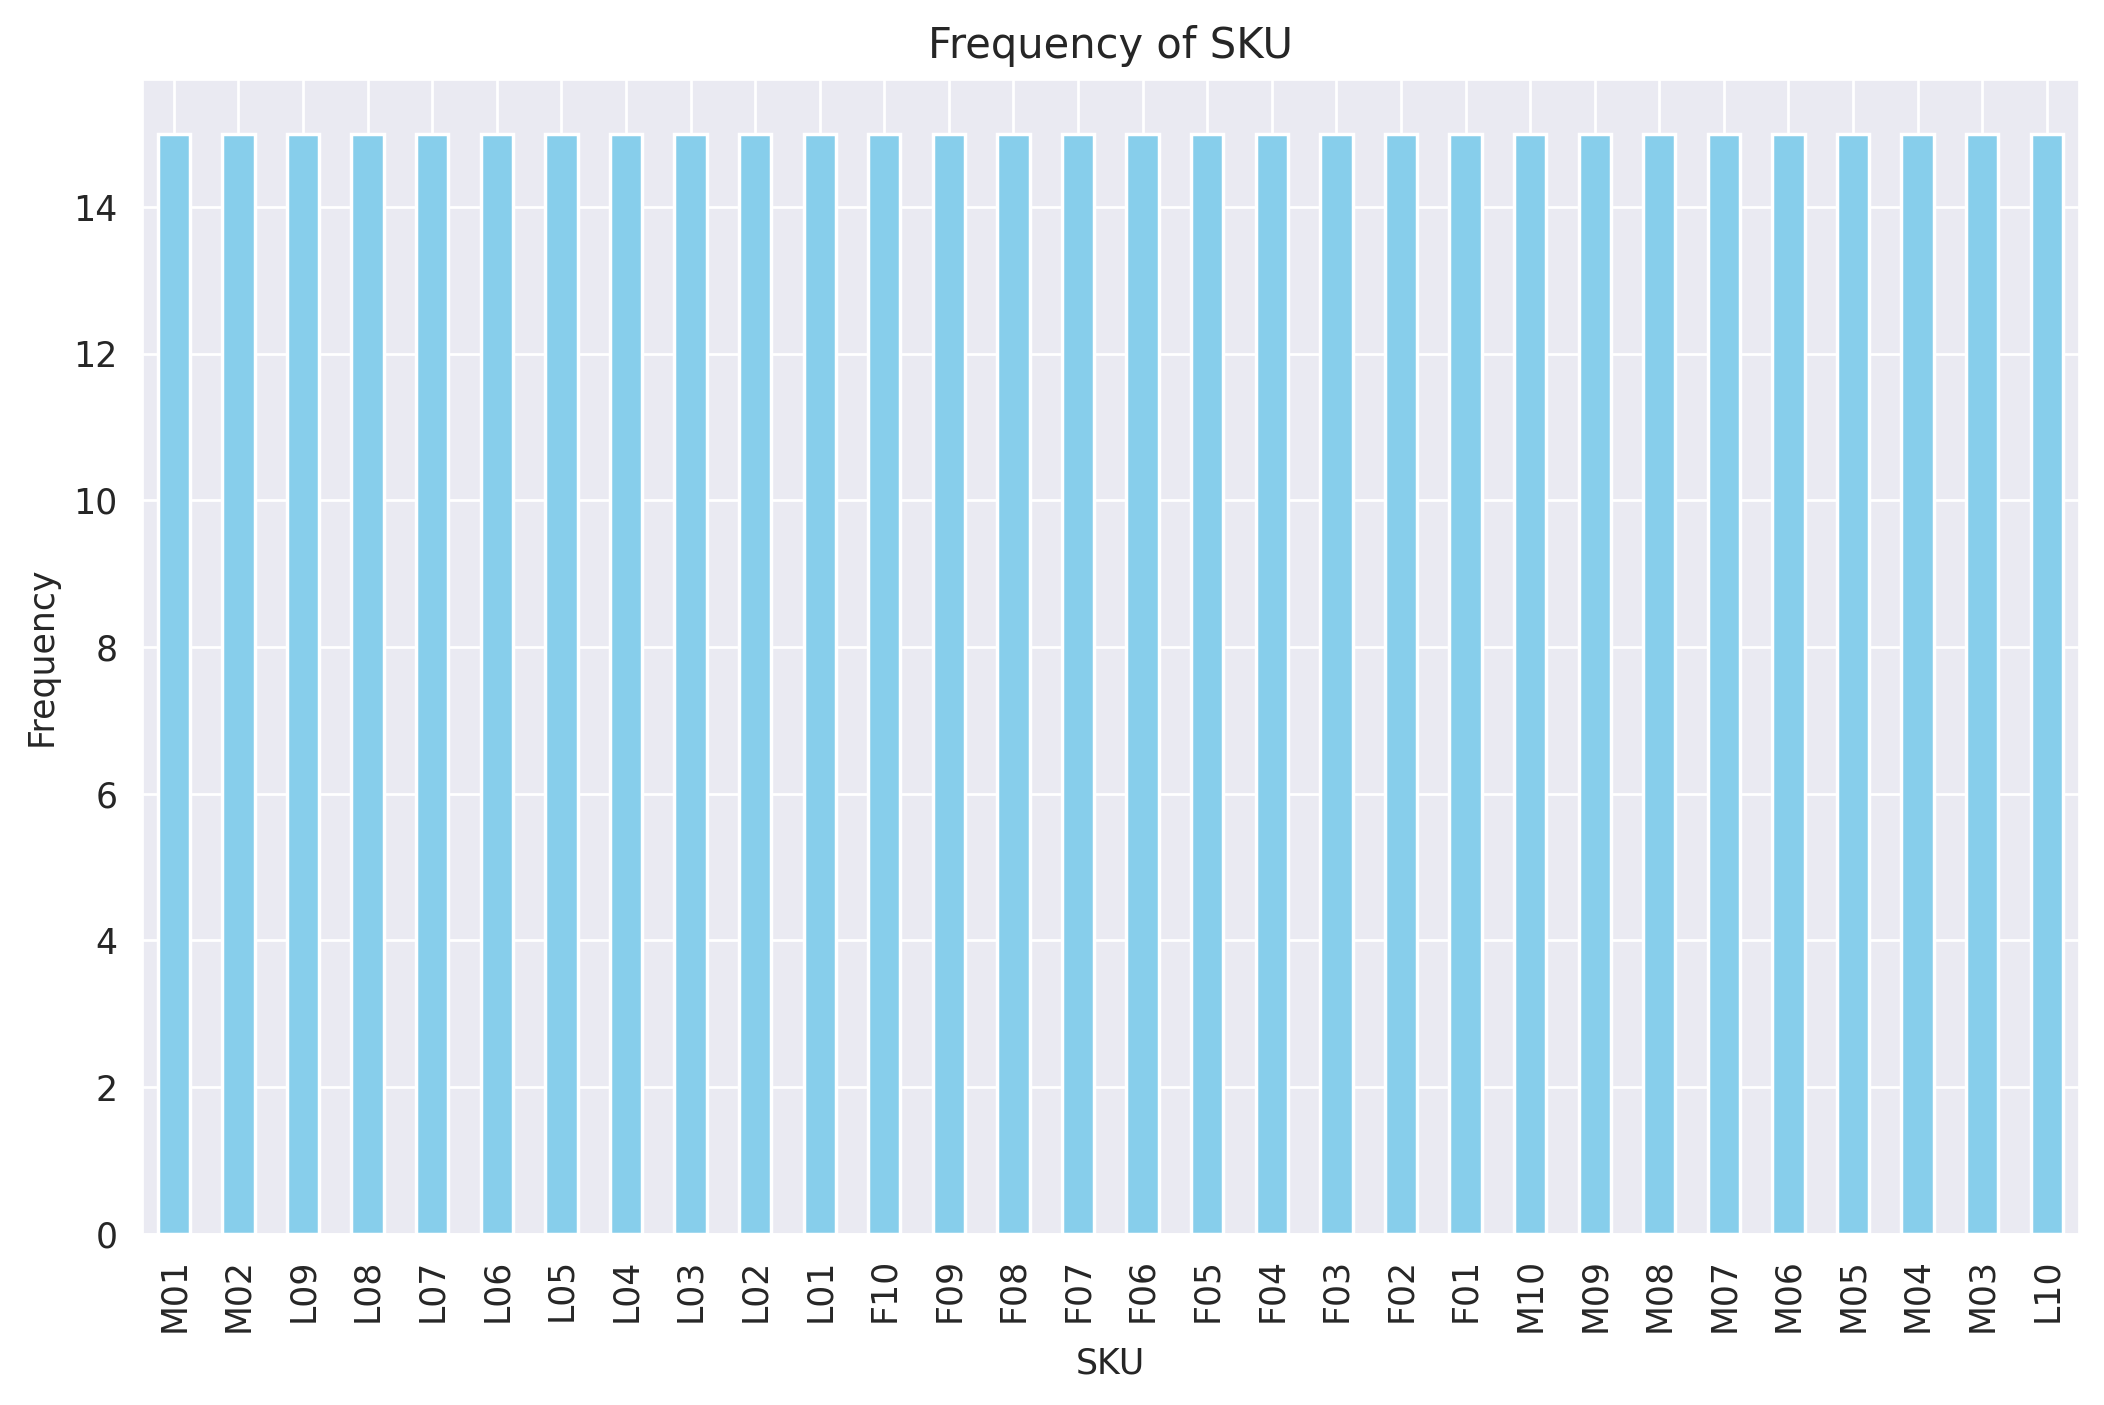

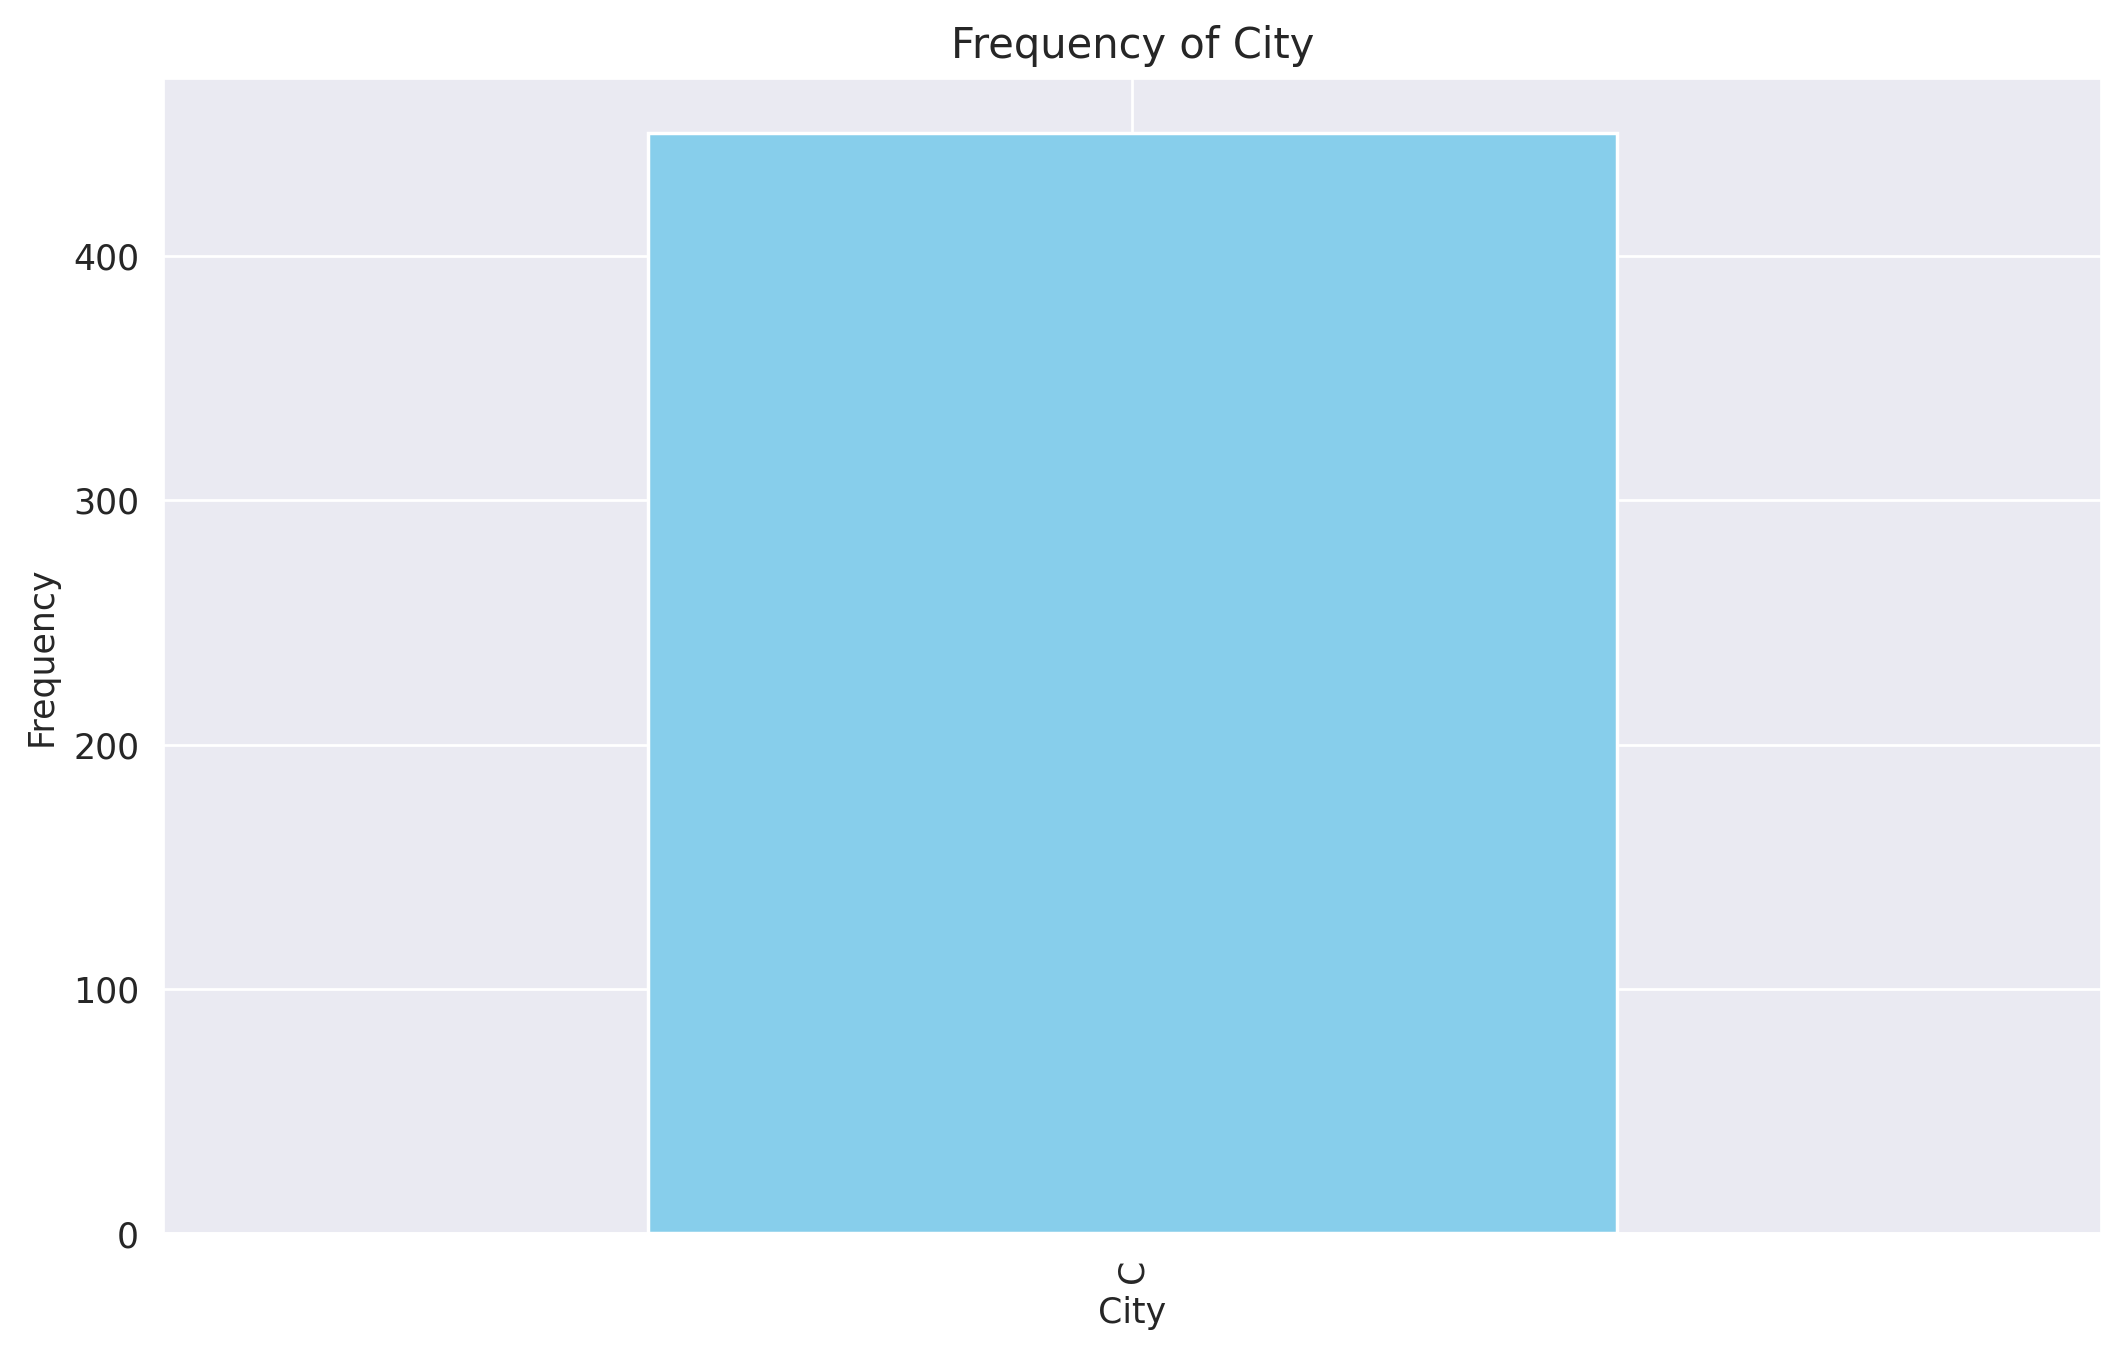

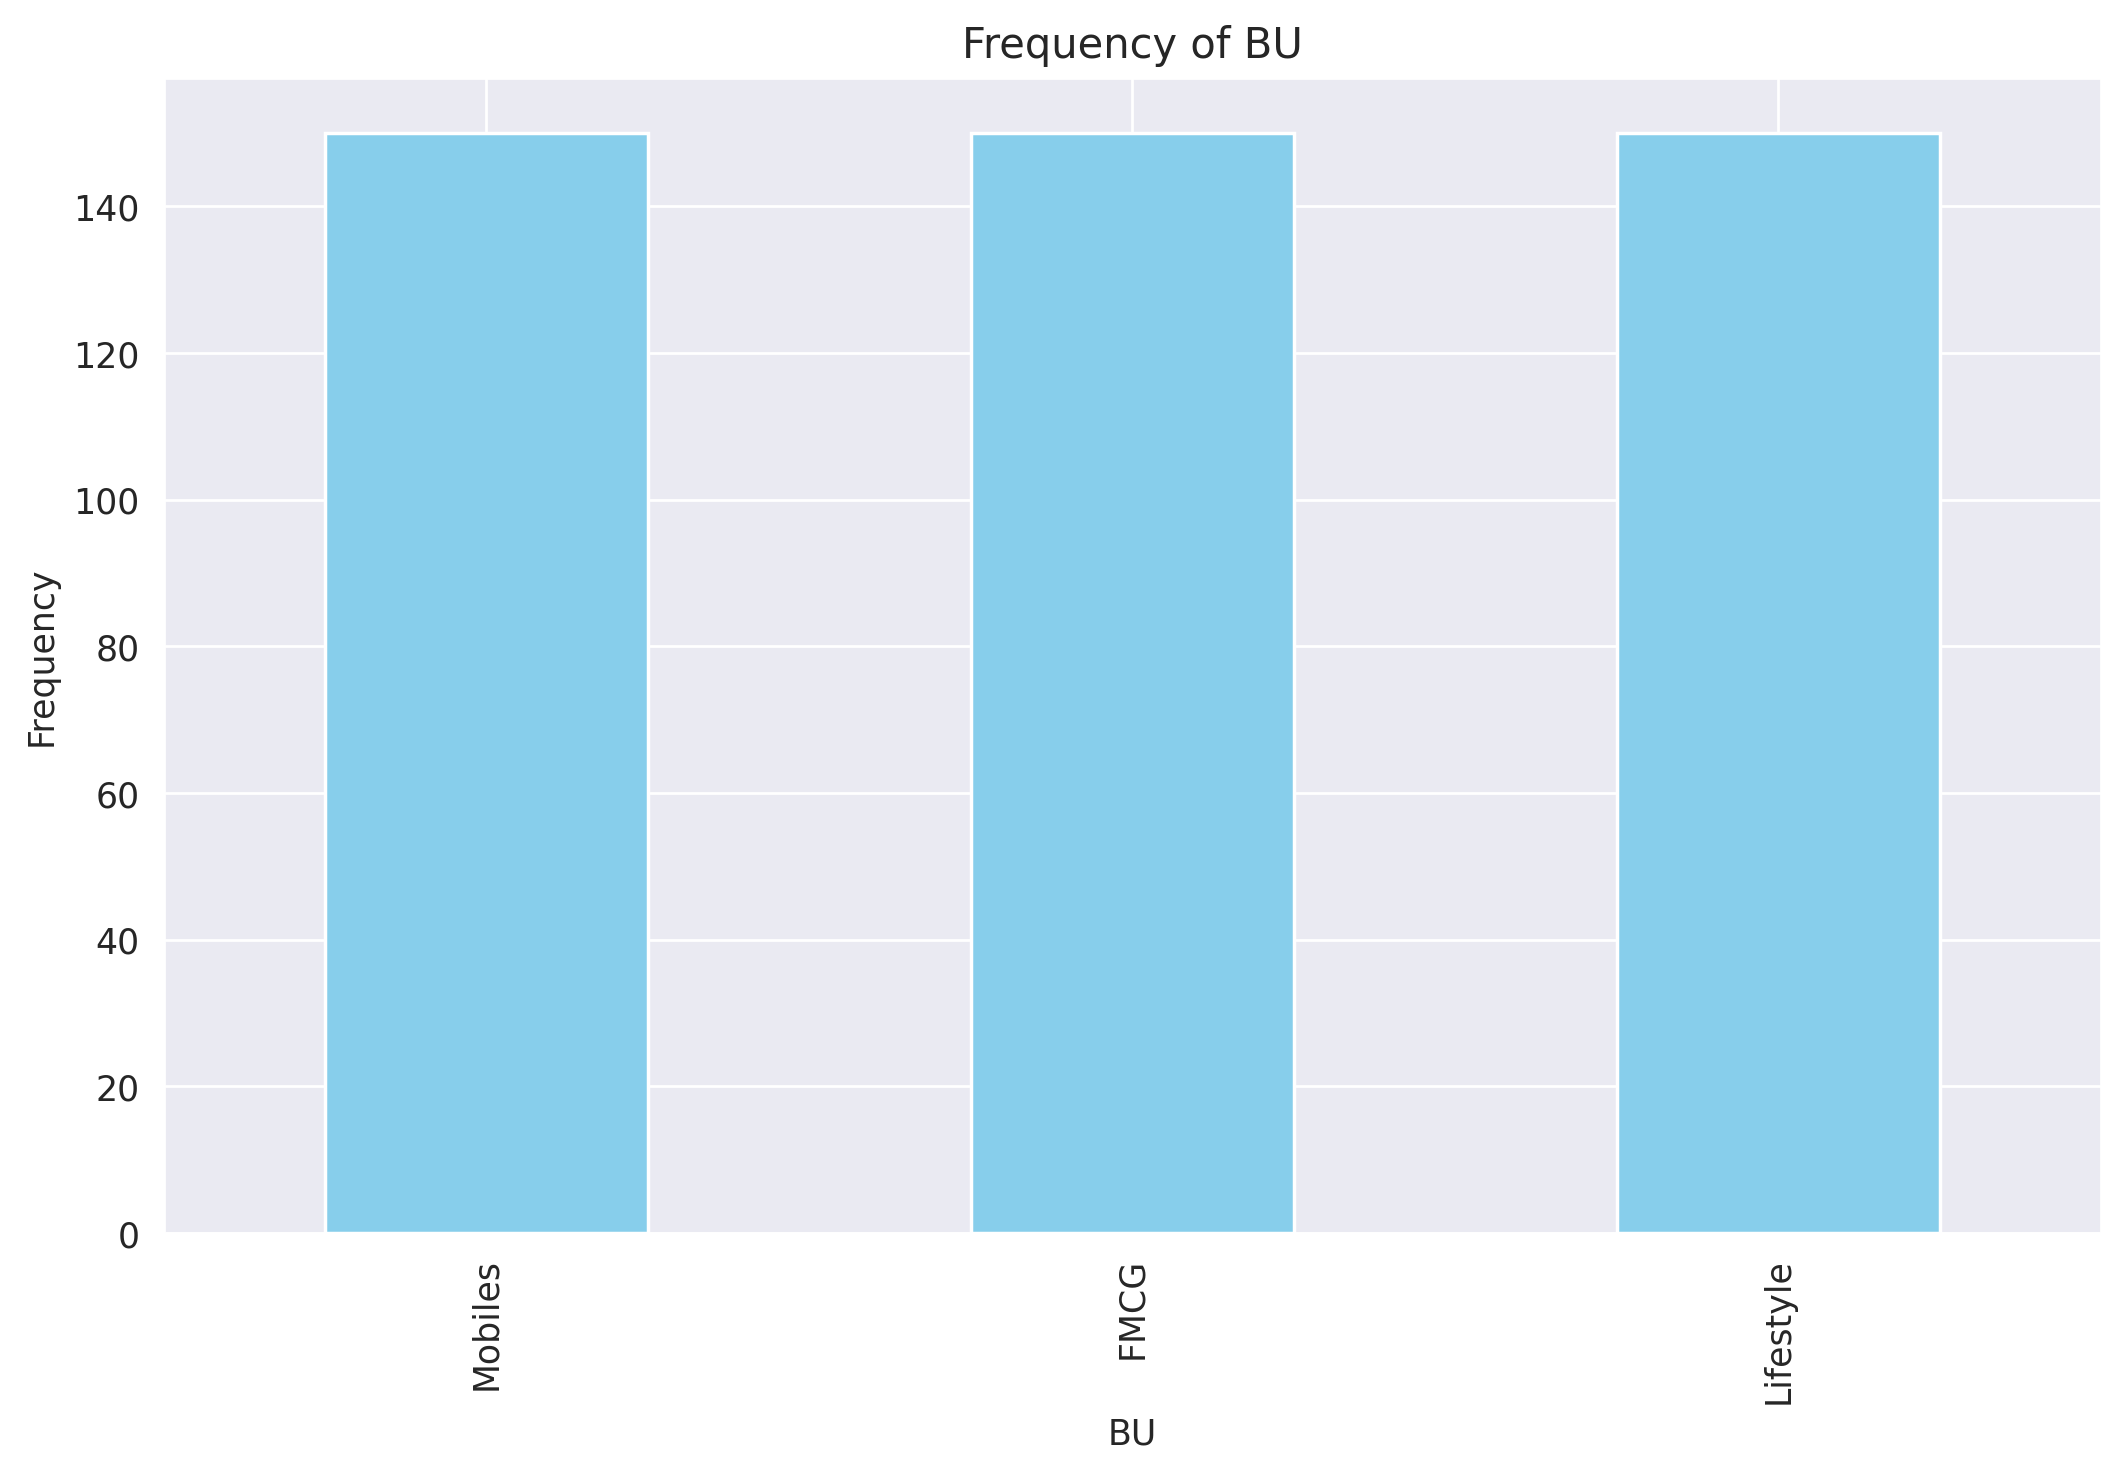

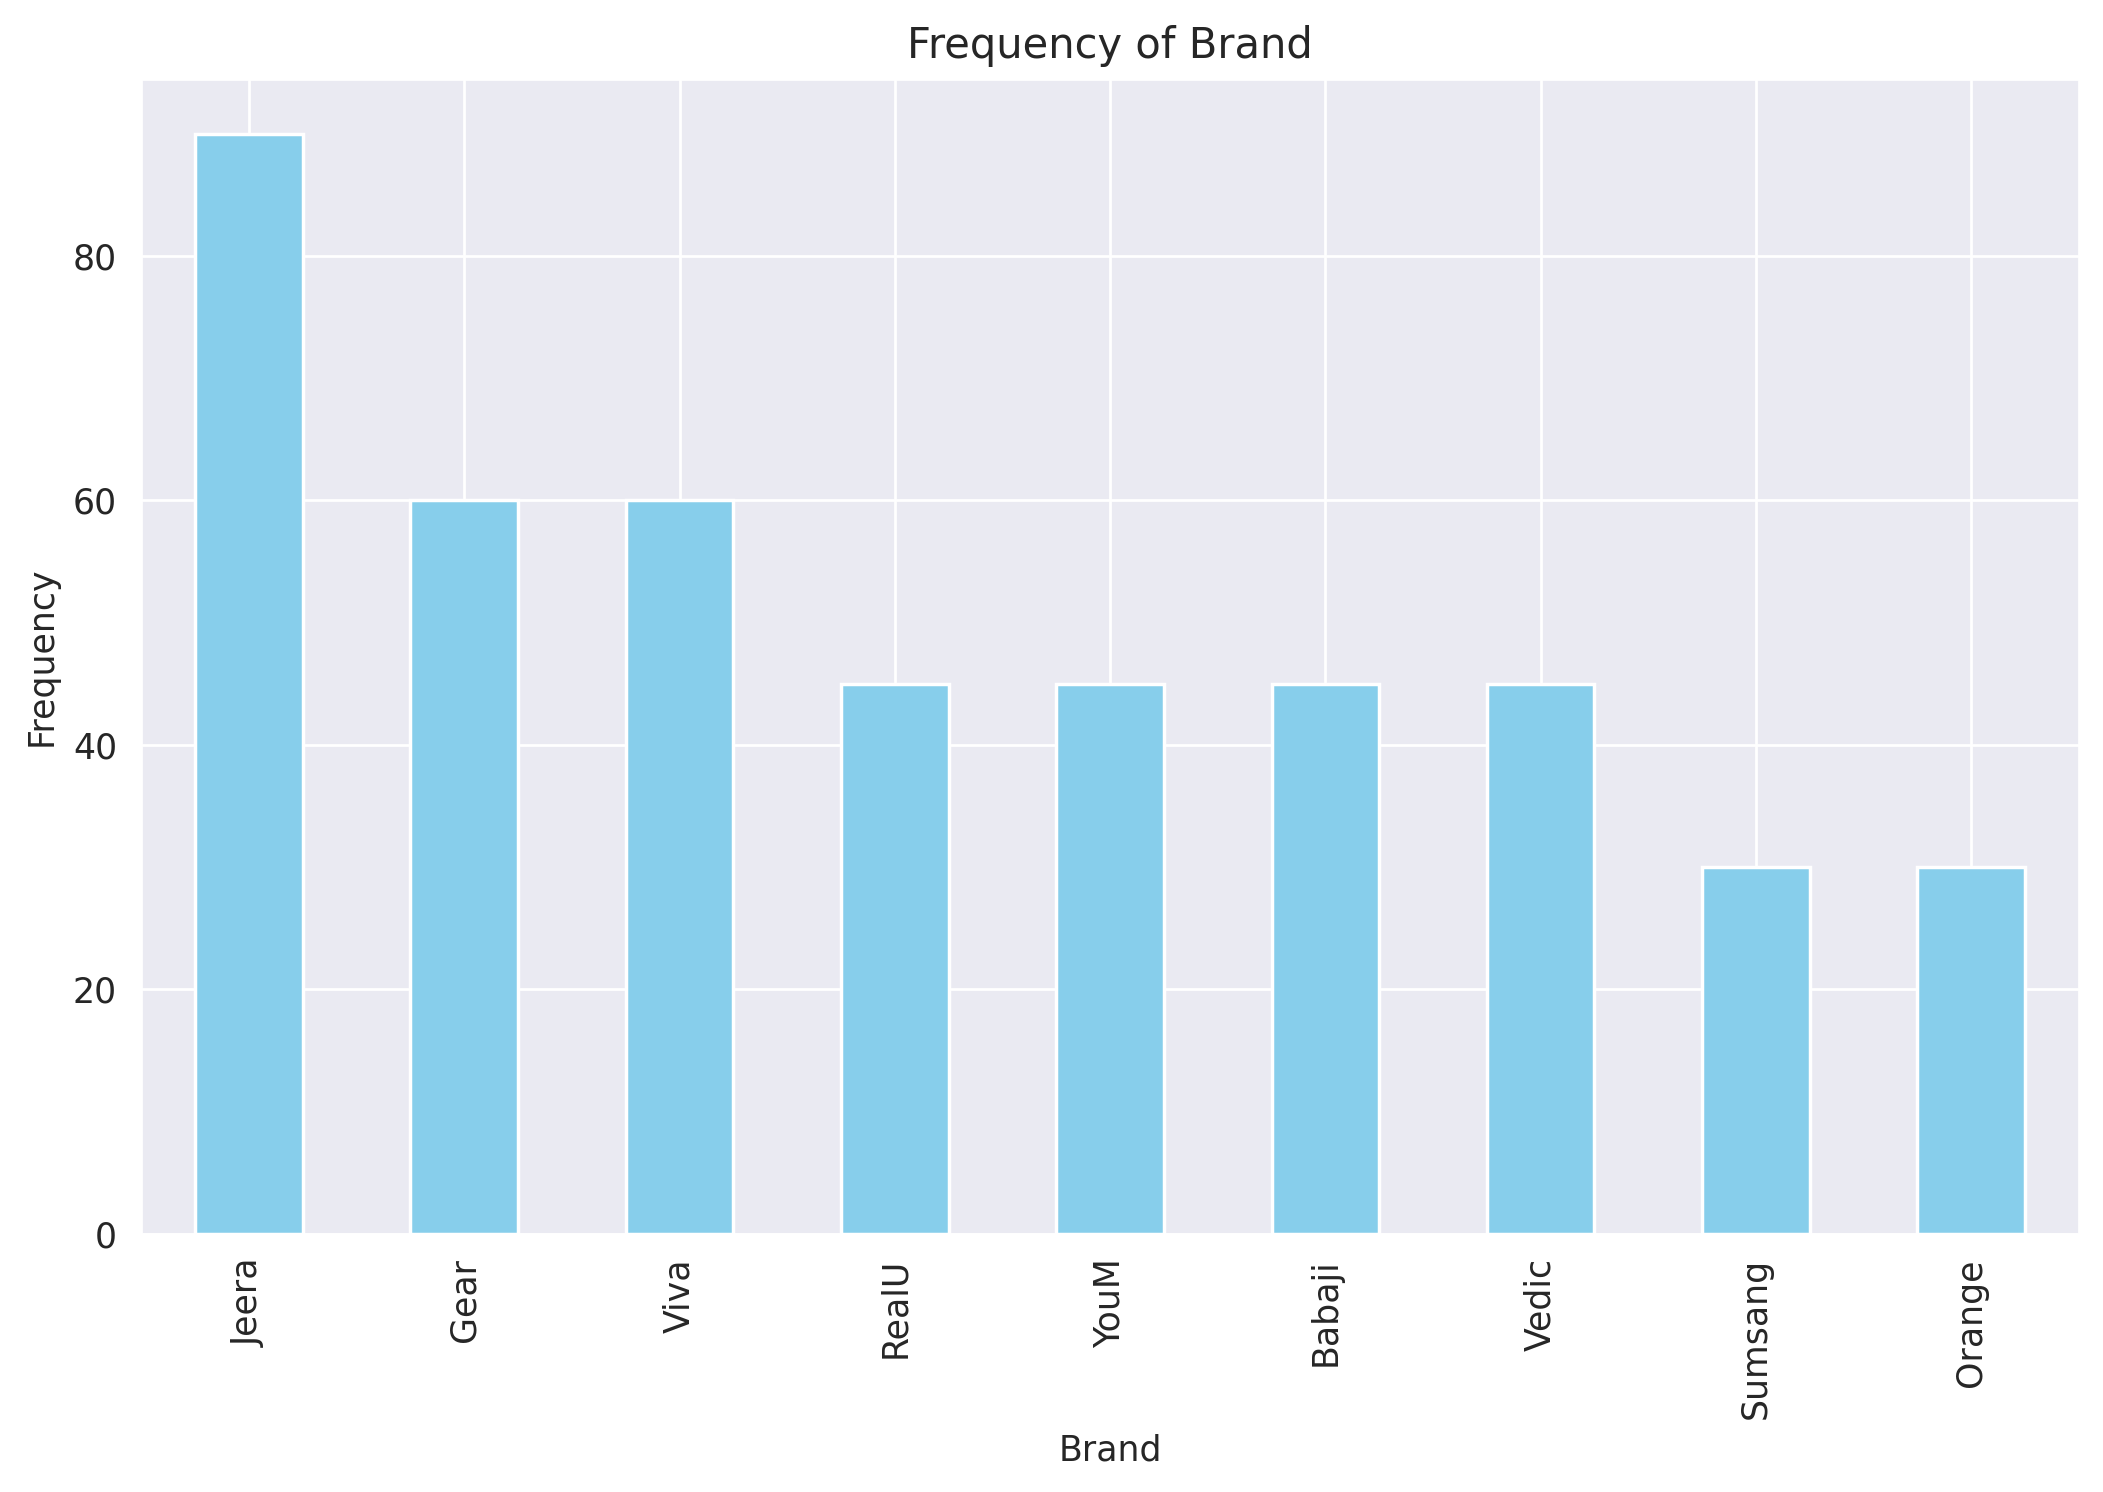

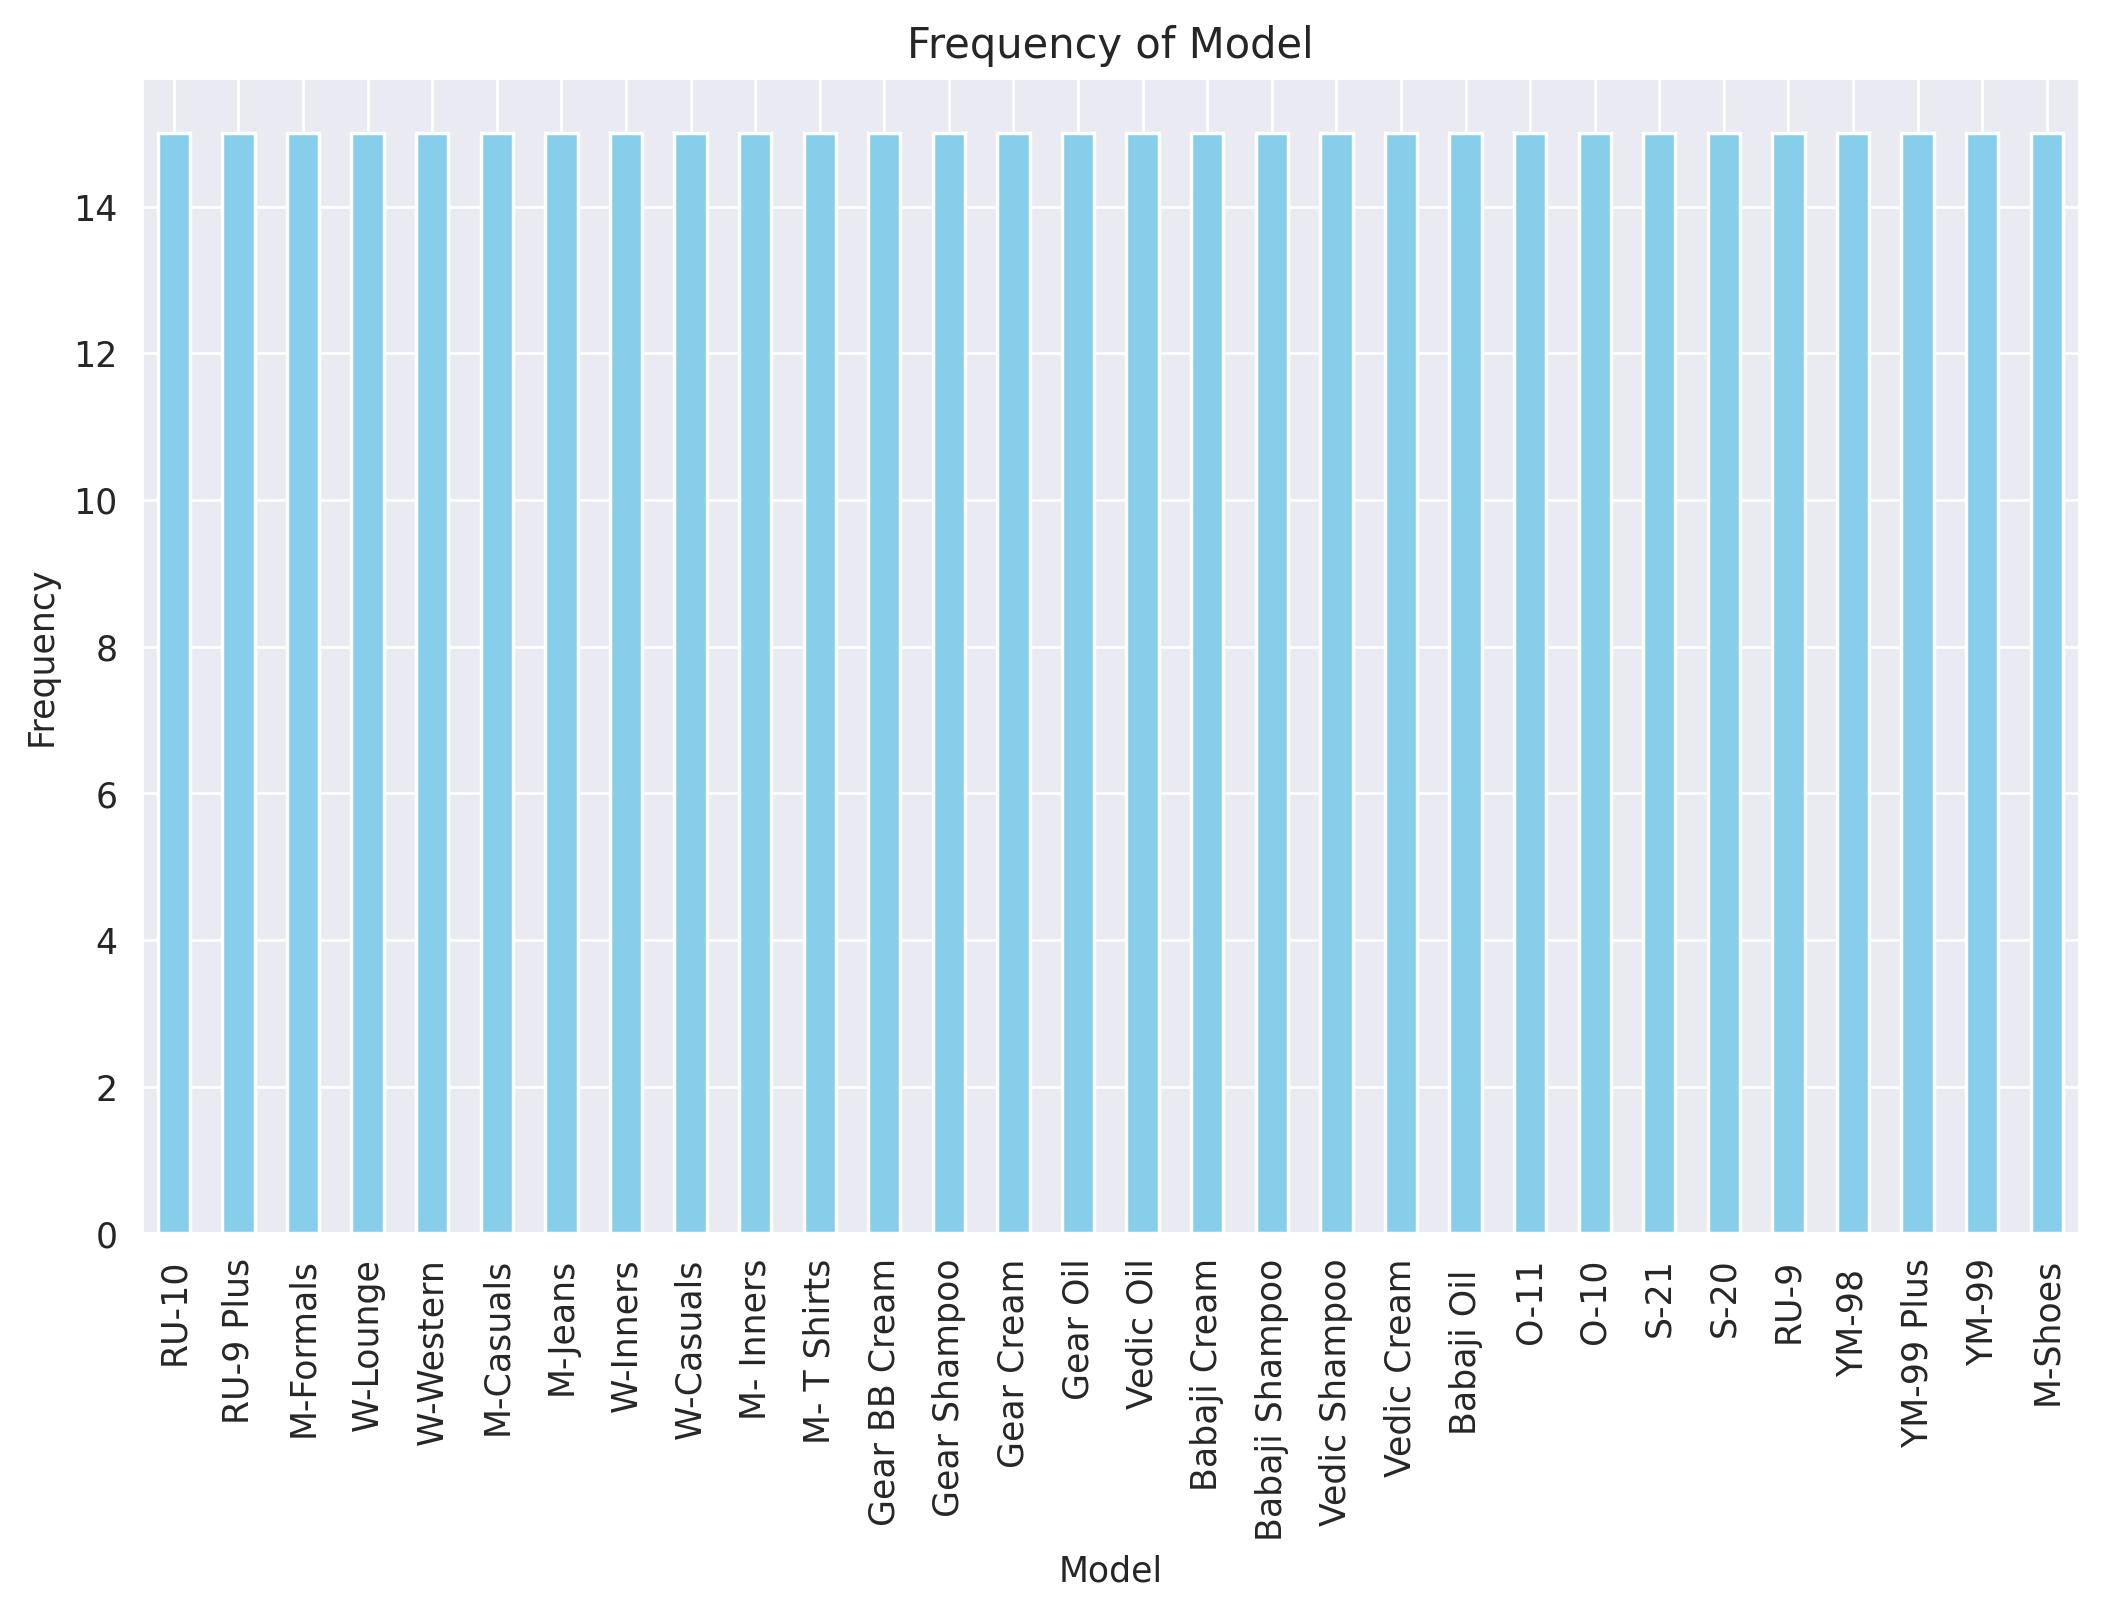

In [12]:
# Bar Chart Analysis for Categorical Colummns
plt.rcParams['figure.figsize'] = (6,3)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid') # background
categorical_col=[x for x in sales.columns if sales[x].dtype =='object']
for i in categorical_col:
    plt.figure(figsize=(10, 6))
    sales[i].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Frequency of '+i)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

# Standardization

In [13]:
numeric_data = sales.select_dtypes(include=['int64','float64'])
numeric_data

Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0        15      12100             181500          11.654820     21153.498820   
1        10      10100             101000          11.560498     11676.102961   
2         7      16100             112700           9.456886     10657.910157   
3         6      20100             120600           6.935385      8364.074702   
4         3       8100              24300          17.995663      4372.946230   
..      ...        ...                ...                ...              ...   
445       2       1300               2600          15.475687       402.367873   
446       6       2600              15600          17.057027      2660.896242   
447       2       1600               3200          18.965550       606.897606   
448       3       1900               5700          16.793014       957.201826   
449       1       3100               3100          15.333300       475.332295   

     Net Sales Value  
0      160346.501180  
1       89323.897039  
2      102042.089843  
3      112235.925298  
4       19927.053770  
..               ...  
445      2197.632127  
446     12939.103758  
447      2593.102394  
448      4742.798174  
449      2624.667705  

[450 rows x 6 columns]

In [14]:
# Standardization is a scaling technique where the values are cantered around the mean with a unit standard deviation.
# Whenever the numeric data is incosistent and having the measure difference in the maximum and the minimum value
# To improve the dataset's suitability for analytical model we need to standardized it
def Standardization(x):
    mu = x.mean()
    std = x.std()
    X = (x-mu)/std
    return X
Scaled_numeric_data = Standardization(numeric_data)
Scaled_numeric_data

Volume  Avg Price  Total Sales Value  Discount Rate (%)  \
0    2.347417   0.091072           2.922469          -0.829365   
1    1.165831  -0.019548           1.329516          -0.851714   
2    0.456880   0.312312           1.561038          -1.350129   
3    0.220563   0.533552           1.717365          -1.947555   
4   -0.488389  -0.130168          -0.188242           0.672990   
..        ...        ...                ...                ...   
445 -0.724706  -0.506277          -0.617647           0.075924   
446  0.220563  -0.434374          -0.360400           0.450596   
447 -0.724706  -0.489684          -0.605774           0.902788   
448 -0.488389  -0.473091          -0.556303           0.388042   
449 -0.961023  -0.406719          -0.607753           0.042188   

     Discount Amount  Net Sales Value  
0           3.948422         2.801638  
1           1.846958         1.269613  
2           1.621190         1.543957  
3           1.112568         1.763847  
4           0.227598        -0.227342  
..               ...              ...  
445        -0.652815        -0.609783  
446        -0.152022        -0.378079  
447        -0.607464        -0.601252  
448        -0.529789        -0.554881  
449        -0.636636        -0.600571  

[450 rows x 6 columns]

We can see, scaled data is around the mean=0 and standard deviation =1

# Conversion of Categorical Data into Dummy Variables

In [15]:
categorical_data = sales.select_dtypes(include='object')
categorical_data

Date       Day  SKU City         BU  Brand       Model
0    01-04-2021  Thursday  M01    C    Mobiles  RealU       RU-10
1    01-04-2021  Thursday  M02    C    Mobiles  RealU   RU-9 Plus
2    01-04-2021  Thursday  M03    C    Mobiles   YouM       YM-99
3    01-04-2021  Thursday  M04    C    Mobiles   YouM  YM-99 Plus
4    01-04-2021  Thursday  M05    C    Mobiles   YouM      YM-98 
..          ...       ...  ...  ...        ...    ...         ...
445  15-04-2021  Thursday  L06    C  Lifestyle  Jeera   M-Casuals
446  15-04-2021  Thursday  L07    C  Lifestyle   Viva   W-Western
447  15-04-2021  Thursday  L08    C  Lifestyle   Viva    W-Lounge
448  15-04-2021  Thursday  L09    C  Lifestyle  Jeera   M-Formals
449  15-04-2021  Thursday  L10    C  Lifestyle  Jeera     M-Shoes

[450 rows x 7 columns]

In [16]:
categorical_col=[x for x in sales.columns if sales[x].dtype =='object']
encoded_categorical_data = pd.get_dummies(data = categorical_data, columns = categorical_col)
encoded_categorical_data

Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0               True            False            False            False   
1               True            False            False            False   
2               True            False            False            False   
3               True            False            False            False   
4               True            False            False            False   
..               ...              ...              ...              ...   
445            False            False            False            False   
446            False            False            False            False   
447            False            False            False            False   
448            False            False            False            False   
449            False            False            False            False   

     Date_05-04-2021  Date_06-04-2021  Date_07-04-2021  Date_08-04-2021  \
0              False            False            False            False   
1              False            False            False            False   
2              False            False            False            False   
3              False            False            False            False   
4              False            False            False            False   
..               ...              ...              ...              ...   
445            False            False            False            False   
446            False            False            False            False   
447            False            False            False            False   
448            False            False            False            False   
449            False            False            False            False   

     Date_09-04-2021  Date_10-04-2021  ...  Model_Vedic Cream  \
0              False            False  ...              False   
1              False            False  ...              False   
2              False            False  ...              False   
3              False            False  ...              False   
4              False            False  ...              False   
..               ...              ...  ...                ...   
445            False            False  ...              False   
446            False            False  ...              False   
447            False            False  ...              False   
448            False            False  ...              False   
449            False            False  ...              False   

     Model_Vedic Oil  Model_Vedic Shampoo  Model_W-Casuals  Model_W-Inners  \
0              False                False            False           False   
1              False                False            False           False   
2              False                False            False           False   
3              False                False            False           False   
4              False                False            False           False   
..               ...                  ...              ...             ...   
445            False                False            False           False   
446            False                False            False           False   
447            False                False            False           False   
448            False                False            False           False   
449            False                False            False           False   

     Model_W-Lounge  Model_W-Western  Model_YM-98   Model_YM-99  \
0             False            False         False        False   
1             False            False         False        False   
2             False            False         False         True   
3             False            False         False        False   
4             False            False          True        False   
..              ...              ...           ...          ...   
445           Fa

Now we can see, all the columns are now encoded to 0 or 1 data values by creating dummy variables

# Conclusion

In [17]:
# Summary
!pip install pandas_profiling==3.1.0
!pip install -U ydata-profiling
!pip install sweetviz
import pandas_profiling as pp
EDA_report=pp.ProfileReport(sales)
EDA_report

  Using cached visions-0.7.6-py3-none-any.whl (104 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
sales.describe()

Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.788059  
75%        5316.495427     47847.912852  
max       25738.022194    179507.479049

In [19]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [20]:
# From this above information we can clearly see
# 1) There are 13 columns present, Out of which 7 columns are of 'object' type and 6 columns are 'numeric' type
# 2) For numeric columns the basic values like mean, median, std are given
# 3) No missing values are present there
# 4) In total there are 450 rows
# 5) There are outliers present in all of the numeric columns, we need to treat them
# 6) Data-preprocessing helps to build the model in a uniform way without any incosistency